# 🌡️ Climate Change Data Analysis

# Global Climate Change Indicators (2000-2024) 🌍

**Subtitle:** Tracking Temperature, Emissions, Sea Level Rise, and Environmental Trends Across Countries

**Description:**  
A comprehensive dataset capturing key climate change indicators across countries from 2000 to 2024 (1000 data points). It includes average temperature, CO2 emissions, sea-level rise, rainfall, population, renewable energy share, extreme weather events, and forest area, enabling trend analysis, correlations, and anomaly detection.

**Fields:**
- **Year:** Data recorded year (2000–2024) for trend analysis.  
- **Country:** Country/region of data collection.  
- **Average Temperature (°C):** Annual temperature for regional comparisons.  
- **CO2 Emissions (Metric Tons/Capita):** Per capita emissions reflecting human impact.  
- **Sea Level Rise (mm):** Annual sea-level rise, critical for coastal studies.  
- **Rainfall (mm):** Annual precipitation patterns.  
- **Population:** Used to normalize per-capita metrics.  
- **Renewable Energy (%):** Share of energy from sustainable sources.  
- **Extreme Weather Events:** Number of events like floods, hurricanes, droughts.  
- **Forest Area (%):** Land area covered by forests, indicating biodiversity & carbon capture.

**Applications:**  
- **Climate Research:** Analyze trends and correlations between emissions, temperature, and disasters.  
- **Policy Making:** Inform climate policies and emission reduction targets.  
- **Renewable Energy Studies:** Assess green energy adoption across regions.  
- **Predictive Modeling:** Forecast future climate scenarios.  
- **Education & Awareness:** Explore real-world climate data for learning and advocacy.

1. **📝 Dataset Info**
   - Overview of columns
   - Data types and non-null counts for each column

2. **❓ Missing Values Check**
   - Identifies columns with missing or incomplete climate records

3. **🔁 Duplicate Count**
   - Checks for repeated rows in the dataset

4. **📈 Summary Statistics**
   - Key metrics for numeric columns such as:
     - Mean, Minimum, Maximum  
     - Standard Deviation  
   - Helps understand the overall climate trends

5. **📊 Histograms**
   - Distribution of climate features.
   - Helps visualize frequency and spread of values

6. **📦 Boxplots**
   - Detects outliers in climate measurements  
   - Useful for spotting extreme events or anomalies

7. **💞 Correlation Heatmap**
   - Shows relationships between variables  
   - Helps identify patterns and potential causal links


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         1000 non-null   int64  
 1   Country                      1000 non-null   object 
 2   Avg Temperature (°C)         1000 non-null   float64
 3   CO2 Emissions (Tons/Capita)  1000 non-null   float64
 4   Sea Level Rise (mm)          1000 non-null   float64
 5   Rainfall (mm)                1000 non-null   int64  
 6   Population                   1000 non-null   int64  
 7   Renewable Energy (%)         1000 non-null   float64
 8   Extreme Weather Events       1000 non-null   int64  
 9   Forest Area (%)              1000 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 78.3+ KB
None

Shape of dataset: (1000, 10)

Missing Values:
Year                           0
Country                        0
Avg

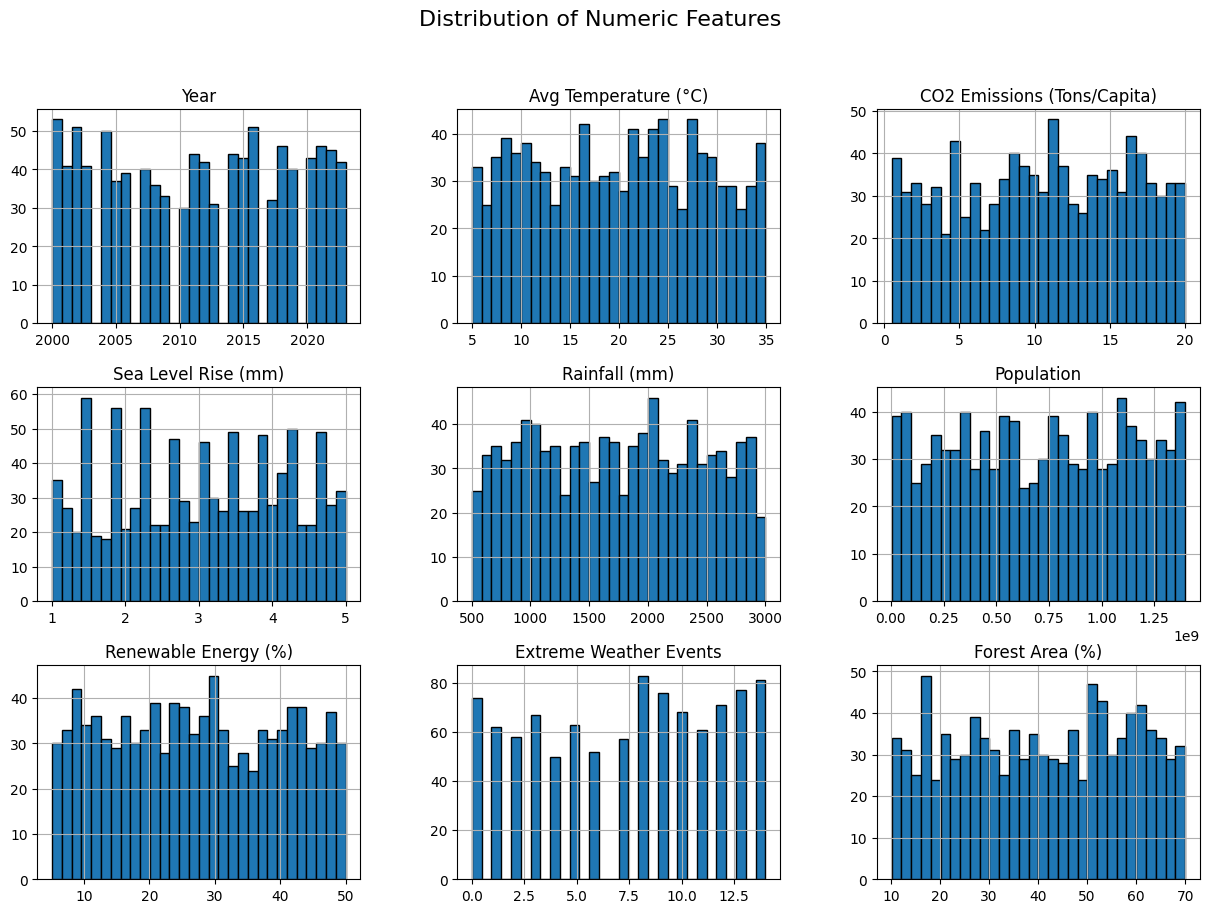

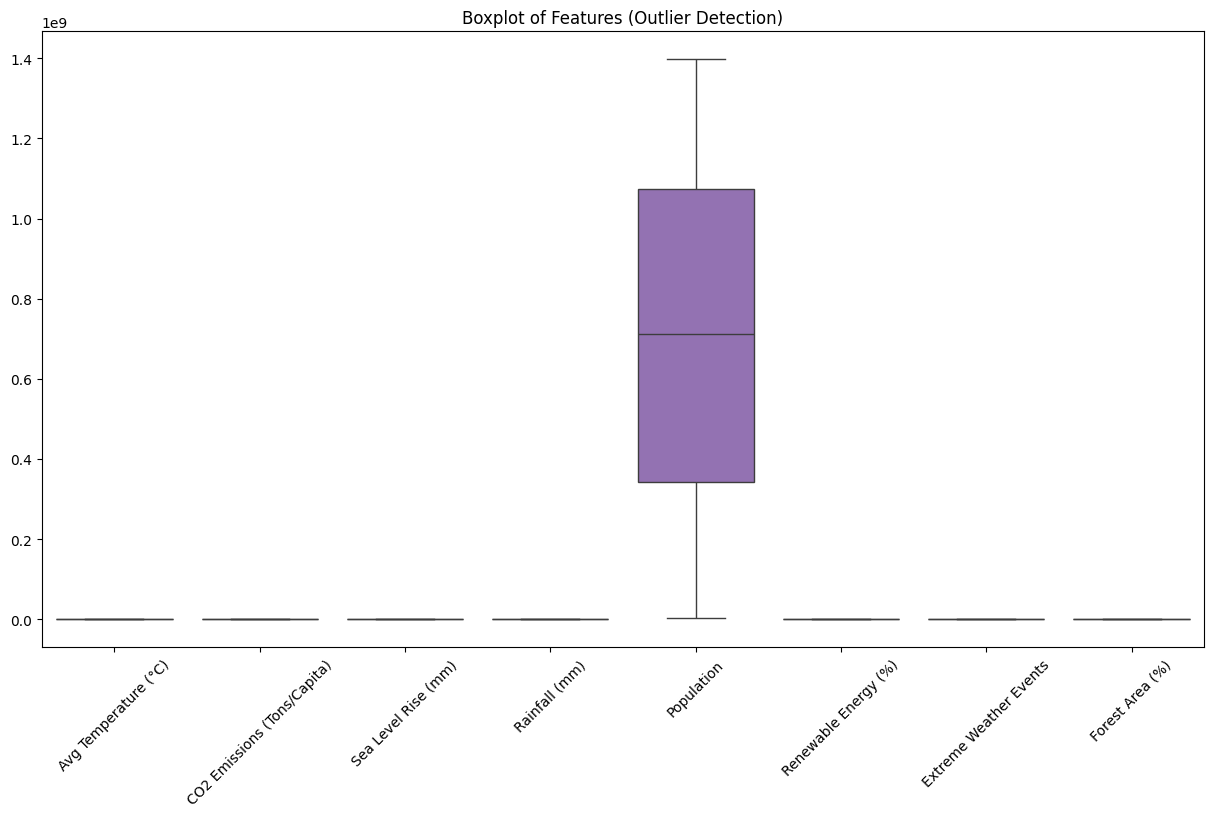

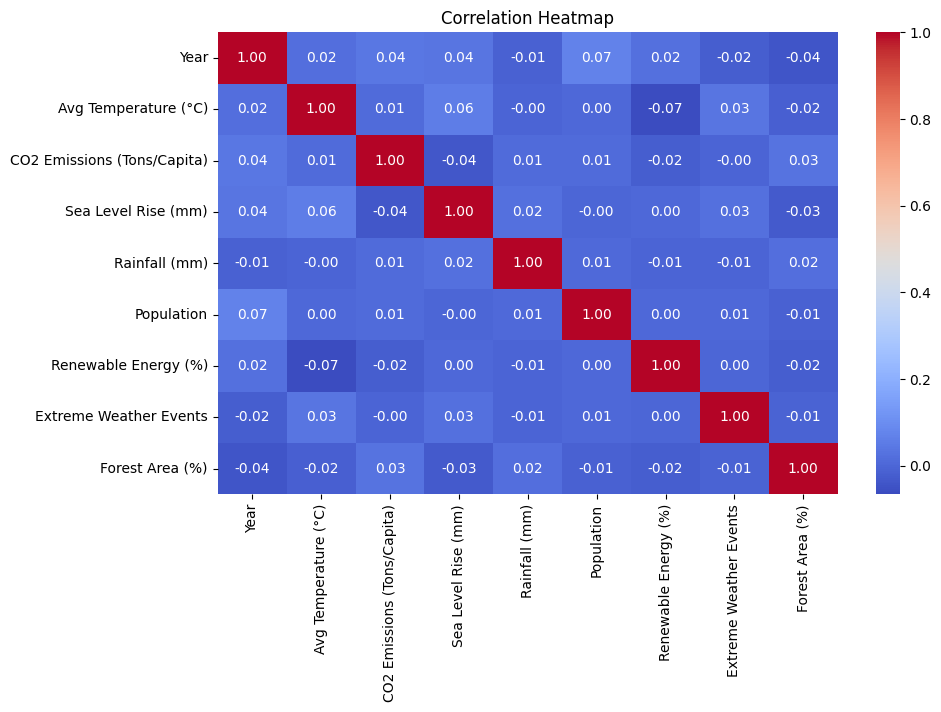

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
file_path = "/content/climate_change_dataset.csv"
df = pd.read_csv(file_path)
print("Dataset Info:")
print(df.info())
print("\nShape of dataset:", df.shape)

# Missing values check

print("\nMissing Values:")
print(df.isnull().sum())

# Duplicates check

print("\nNumber of Duplicates:", df.duplicated().sum())

# Summary statistics

print("\nSummary Statistics:")
print(df.describe(include="all"))


# First few rows

print("\nFirst 5 Rows:")
print(df.head())


# Visual Data Understanding


# Histograms for numeric columns
df.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.drop(columns=["Year","Country"]))
plt.title("Boxplot of Features (Outlier Detection)")
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap (only numeric columns)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



# 🌍 Climate Change Data Preprocessing & Analysis

cleaning to visualization.

## 1️⃣ Data Cleaning
- **Removes duplicates** to avoid repeated records.
- **Handles outliers** using the Interquartile Range (IQR) method.

## 2️⃣ Data Normalization
- **MinMax Scaling** applied to numeric features.
- Ensures consistent ranges for analysis and visualization.

## 3️⃣ Data Aggregation
- **Groups data by Year & Country** for trend analysis.
- Enables comparison across time and regions.

## 4️⃣ Feature Engineering
- **New KPIs created**:
  - `CO2 per Million` – CO₂ emissions normalized by population.
  - `Extreme Events per Million` – Extreme climate events per population unit.

## 5️⃣ Visualization
- **Correlation Heatmap** of cleaned and processed features.
- Highlights relationships among climate variables .


Original shape: (1000, 10)
After removing duplicates: (1000, 10)
After removing outliers: (1000, 10)

Scaled dataset sample:
   Year    Country  Avg Temperature (°C)  CO2 Emissions (Tons/Capita)  \
0  2006         UK              0.130435                     0.451282   
1  2019        USA              0.869565                     0.220513   
2  2014     France              0.966555                     0.117949   
3  2010  Argentina              0.030100                     0.066667   
4  2007    Germany              0.732441                     0.261538   

   Sea Level Rise (mm)  Rainfall (mm)  Population  Renewable Energy (%)  \
0                0.525       0.376301    0.378403                  20.4   
1                0.800       0.763010    0.074427                  49.2   
2                0.300       0.296237    0.313948                  33.3   
3                0.550       0.556845    0.765066                  23.7   
4                0.350       0.497198    0.086423            

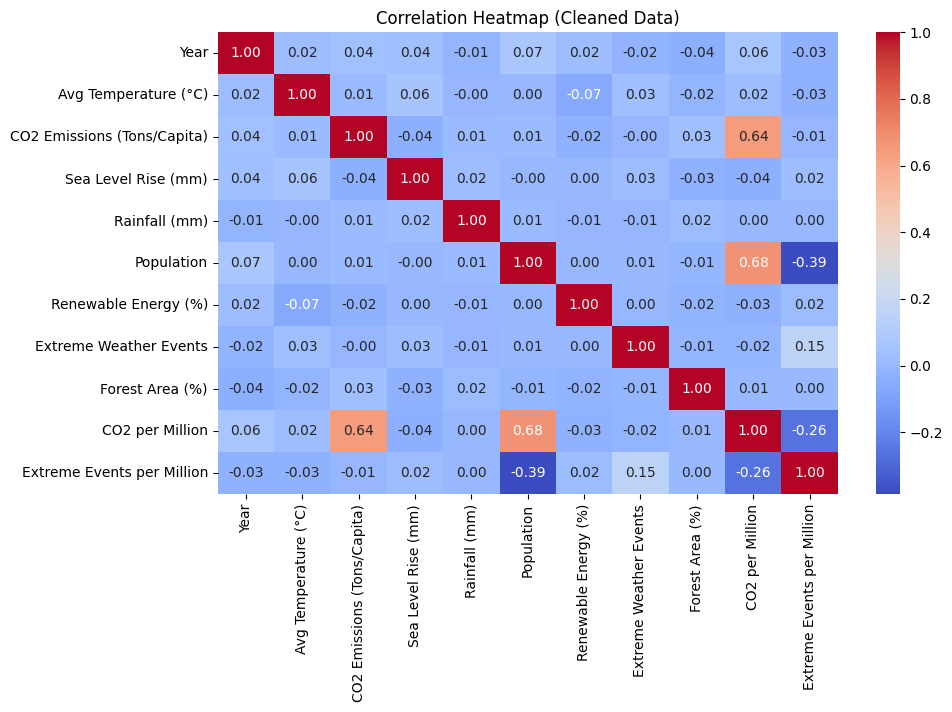

In [2]:
# Remove duplicates

print("Original shape:", df.shape)
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)


# Handle Outliers (IQR Method)

numeric_cols = df.select_dtypes(include=['int64','float64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print("After removing outliers:", df.shape)

# Normalize Units (Scaling selected features)

scaler = MinMaxScaler()
scaled_cols = [
    'Population',
    'CO2 Emissions (Tons/Capita)',
    'Avg Temperature (°C)',
    'Rainfall (mm)',
    'Sea Level Rise (mm)'
]

df_scaled = df.copy()
df_scaled[scaled_cols] = scaler.fit_transform(df_scaled[scaled_cols])
print("\nScaled dataset sample:")
print(df_scaled.head())

# Grouping for Analysis

# Yearly global averages
yearly_summary = df.groupby("Year").mean(numeric_only=True)
print("\nYearly Global Summary:")
print(yearly_summary.head())

# Country-level averages
country_summary = df.groupby("Country").mean(numeric_only=True)
print("\nCountry-level Summary:")
print(country_summary.head())

# Feature Engineering (extra insights)


# CO2 per million population
df['CO2 per Million'] = df['CO2 Emissions (Tons/Capita)'] * (df['Population'] / 1_000_000)

# Extreme events per million
df['Extreme Events per Million'] = df['Extreme Weather Events'] / (df['Population'] / 1_000_000)

print("\nDataset with engineered features:")
print(df.head())

# Quick Visualization Checks

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Cleaned Data)")
plt.show()


# Climate Data Analysis Questions 🌍📊

1. **CO2 Emissions Trend**  
   How have CO2 emissions per capita changed over time globally or for specific countries?

2. **Temperature Distribution**  
   What is the distribution of average temperatures? Are there any unusual peaks or patterns?

3. **Extreme Weather Events**  
   How has the total number of extreme weather events changed each year?

4. **CO2 Emissions by Country**  
   Which countries have the highest average CO2 emissions per capita? How does it vary geographically?

5. **CO2 vs Temperature**  
   Is there a correlation between CO2 emissions per capita and average temperature?  

6. **CO2 vs Extreme Weather Events**  
   How do CO2 emissions per capita relate to the frequency of extreme weather events?

7. **Population vs CO2 Emissions**  
   How does population size influence CO2 emissions per capita? Are more populous countries emitting more or less per capita?

8. **Correlation Analysis**  
   What are the correlations between key climate variables like CO2 emissions, average temperature, extreme weather events, sea level rise, and rainfall?

9. **CO2 Emissions by Country Over Time**  
   How do CO2 emissions per capita trends differ across countries over the years?

10. **Seasonal/Yearly Patterns in Extreme Weather Events**  
    Are there observable yearly or seasonal patterns in extreme weather events across countries?


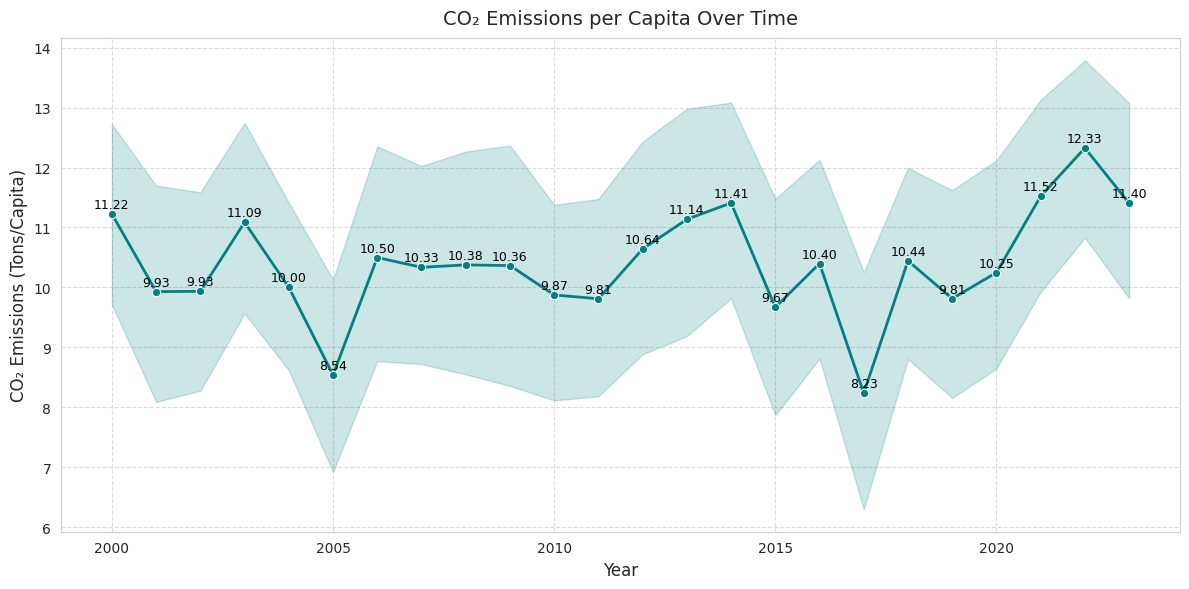

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100  # Improve resolution

# 1. Trend of CO2 Emissions per Capita Over Time → Line Plot with Values
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='CO2 Emissions (Tons/Capita)', marker='o', linewidth=2, color='teal')

# Add value labels at each point (global average per year)
global_trend = df.groupby("Year")["CO2 Emissions (Tons/Capita)"].mean().reset_index()
for x, y in zip(global_trend["Year"], global_trend["CO2 Emissions (Tons/Capita)"]):
    plt.text(x, y + 0.1, f"{y:.2f}", ha='center', fontsize=9, color='black')
plt.title('CO₂ Emissions per Capita Over Time', fontsize=14, pad=10)
plt.xlabel('Year', fontsize=12)
plt.ylabel('CO₂ Emissions (Tons/Capita)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


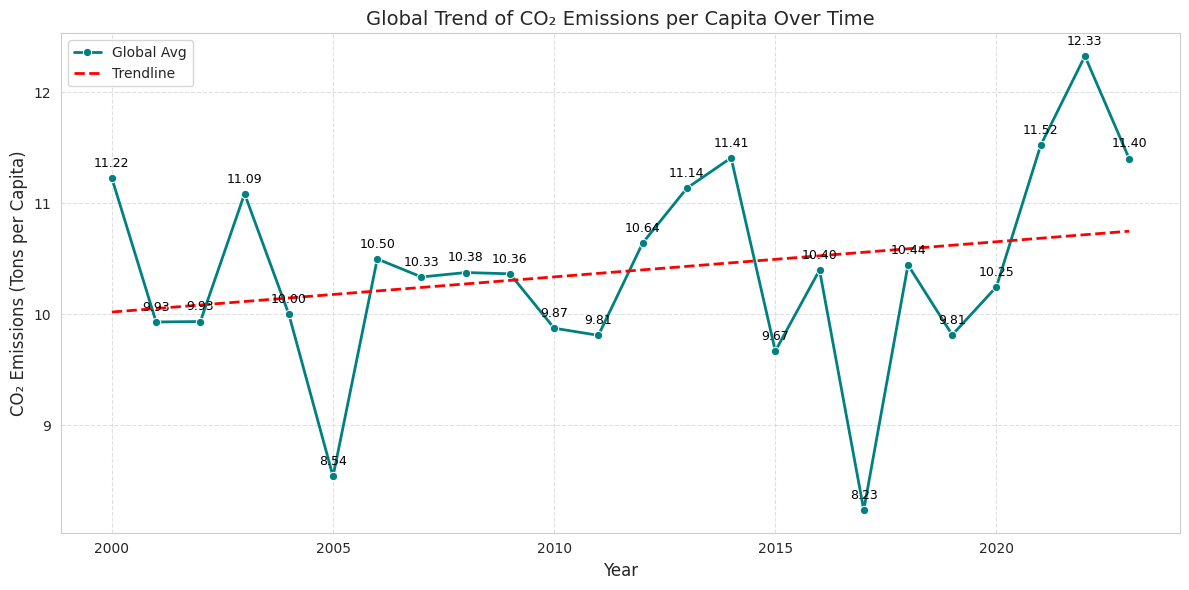

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# 1) Global Average Trend (Line Chart)
global_trend = df.groupby("Year")["CO2 Emissions (Tons/Capita)"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=global_trend, x="Year", y="CO2 Emissions (Tons/Capita)",
             marker="o", linewidth=2, color="teal", label="Global Avg")

# Regression line for trend
X = global_trend["Year"].values.reshape(-1,1)
y = global_trend["CO2 Emissions (Tons/Capita)"].values
model = LinearRegression().fit(X, y)
trend = model.predict(X)
plt.plot(global_trend["Year"], trend, linestyle="--", linewidth=2, color="red", label="Trendline")

# Add value labels to each point
for x_val, y_val in zip(global_trend["Year"], global_trend["CO2 Emissions (Tons/Capita)"]):
    plt.text(x_val, y_val + 0.1, f"{y_val:.2f}", ha='center', fontsize=9, color='black')

plt.title("Global Trend of CO₂ Emissions per Capita Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("CO₂ Emissions (Tons per Capita)", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()



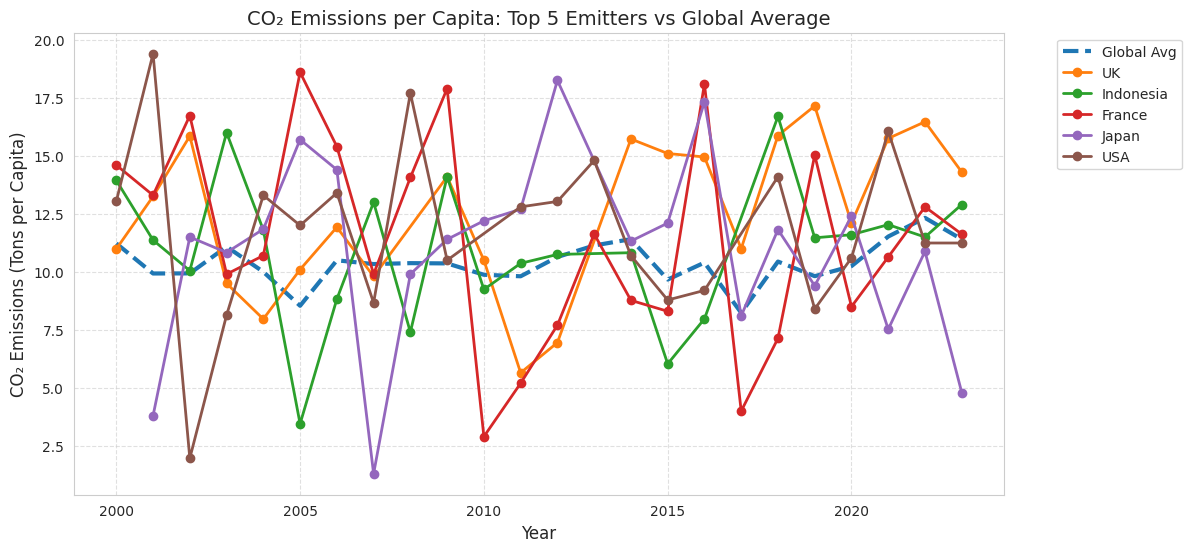

In [20]:
# 2) Comparison: Top 5 Emitters vs Global
# Find top 5 emitters by average CO2 per capita
top5_emitters = (
    df.groupby("Country")["CO2 Emissions (Tons/Capita)"]
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .index.tolist()
)

plt.figure(figsize=(12,6))

# Plot global average
plt.plot(global_trend["Year"], global_trend["CO2 Emissions (Tons/Capita)"],
         label="Global Avg", linewidth=3, linestyle="--")

# Plot each top emitter
for country in top5_emitters:
    sub = df[df["Country"] == country].groupby("Year")["CO2 Emissions (Tons/Capita)"].mean().reset_index()
    plt.plot(sub["Year"], sub["CO2 Emissions (Tons/Capita)"], marker="o", linewidth=2, label=country)

plt.title("CO₂ Emissions per Capita: Top 5 Emitters vs Global Average", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("CO₂ Emissions (Tons per Capita)", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


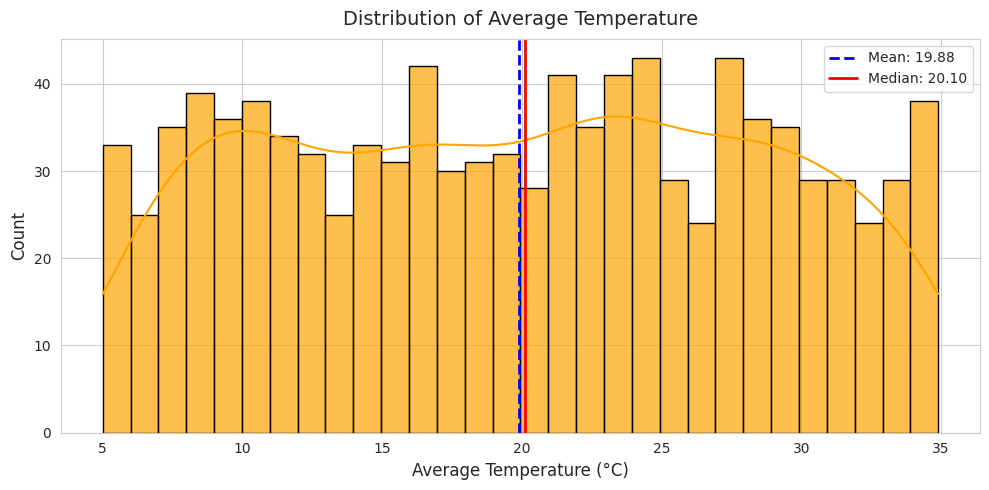

In [36]:
# 2. Distribution of Average Temperature → Histogram + KDE
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean and median
mean_val = df['Avg Temperature (°C)'].mean()
median_val = df['Avg Temperature (°C)'].median()

# Histogram + KDE with mean & median lines
plt.figure(figsize=(10, 5))
sns.histplot(df['Avg Temperature (°C)'], bins=30, kde=True,
             color='orange', edgecolor='black', alpha=0.7)

# Add mean and median lines
plt.axvline(mean_val, color='blue', linestyle='--', linewidth=2, label=f"Mean: {mean_val:.2f}")
plt.axvline(median_val, color='red', linestyle='-', linewidth=2, label=f"Median: {median_val:.2f}")

plt.title('Distribution of Average Temperature', fontsize=14, pad=10)
plt.xlabel('Average Temperature (°C)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()



/tmp/ipython-input-3148480627.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




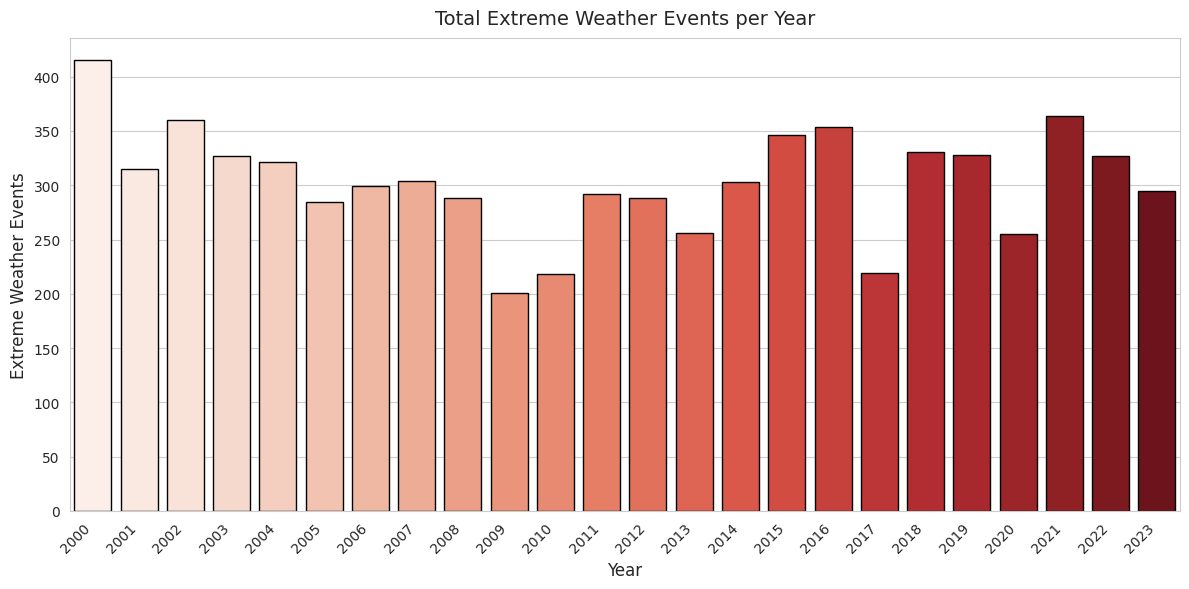

In [9]:
# 3. Extreme Weather Events per Year → Bar Plot
events_per_year = df.groupby('Year')['Extreme Weather Events'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=events_per_year, x='Year', y='Extreme Weather Events', palette='Reds', edgecolor='black')
plt.title('Total Extreme Weather Events per Year', fontsize=14, pad=10)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Extreme Weather Events', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [10]:
# 4. Highest CO2 Emissions per Capita by Country → Choropleth Map
co2_country = df.groupby('Country')['CO2 Emissions (Tons/Capita)'].mean().reset_index()
fig = px.choropleth(co2_country,
                    locations='Country',
                    locationmode='country names',
                    color='CO2 Emissions (Tons/Capita)',
                    color_continuous_scale='Reds',
                    title='Average CO2 Emissions per Capita by Country',
                    labels={'CO2 Emissions (Tons/Capita)': 'CO2 (Tons/Capita)'})
fig.update_layout(title_x=0.5, geo=dict(showframe=False, projection_type='equirectangular'))
fig.show()



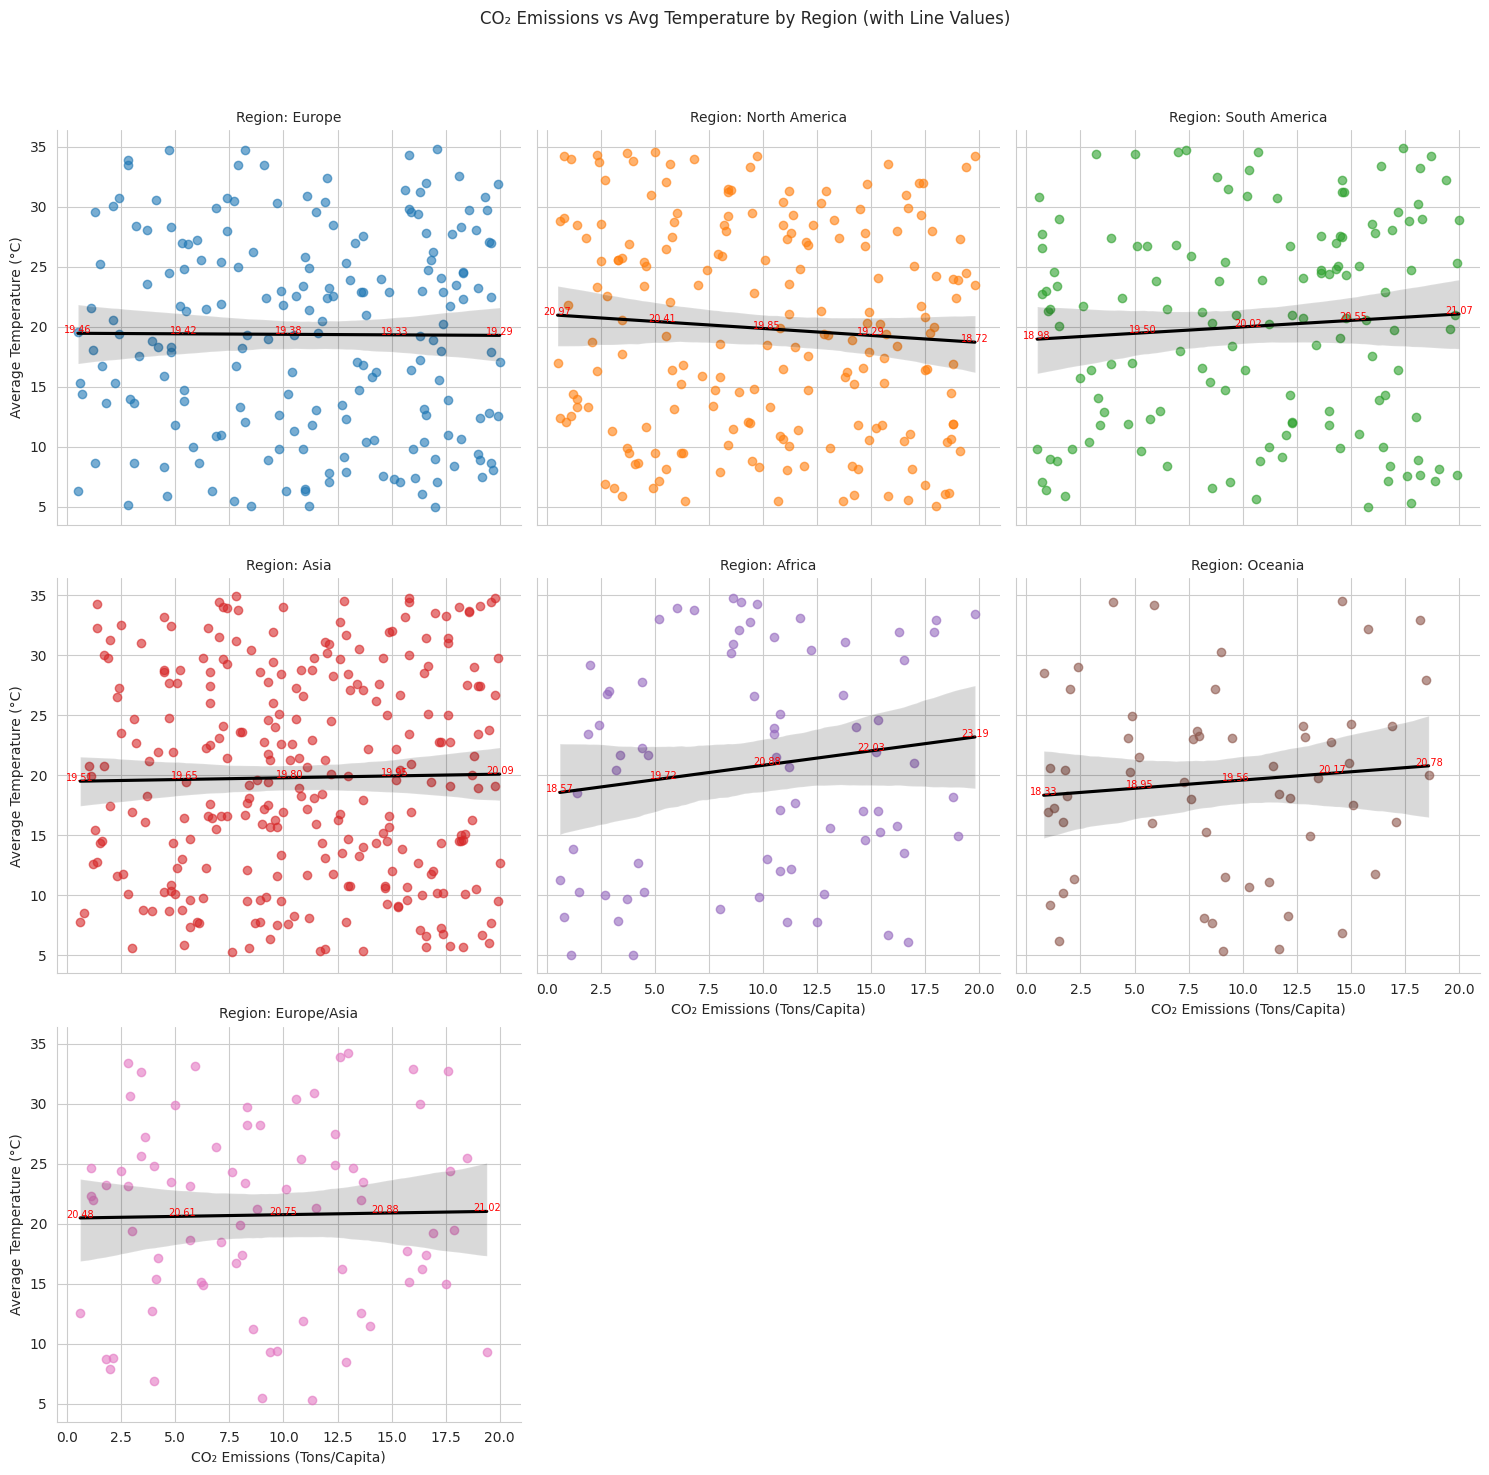

In [49]:
# 5. CO2 Emissions vs Average Temperature → bubble + Regression

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Unique regions
regions = df["Region"].unique()

# Create FacetGrid with scatter + regression line
g = sns.lmplot(
    data=df,
    x="CO2 Emissions (Tons/Capita)",
    y="Avg Temperature (°C)",
    col="Region", hue="Region",
    col_wrap=3, scatter_kws={"alpha":0.6}, line_kws={"color":"black"}
)

# For each region, compute regression values and annotate
for ax, region in zip(g.axes.flat, regions):
    # Subset data for region
    sub = df[df["Region"] == region]
    X = sub["CO2 Emissions (Tons/Capita)"].values.reshape(-1,1)
    y = sub["Avg Temperature (°C)"].values

    if len(sub) > 2:  # need at least 2 points for regression
        model = LinearRegression().fit(X, y)
        X_line = np.linspace(X.min(), X.max(), 5).reshape(-1,1)  # pick 5 points along line
        y_pred = model.predict(X_line)

        # Add predicted value annotations
        for x_val, y_val in zip(X_line.flatten(), y_pred):
            ax.text(x_val, y_val, f"{y_val:.2f}", fontsize=7, color="red", ha="center")

# Titles & labels
g.set_titles("Region: {col_name}")
g.set_axis_labels("CO₂ Emissions (Tons/Capita)", "Average Temperature (°C)")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("CO₂ Emissions vs Avg Temperature by Region (with Line Values)")
plt.show()


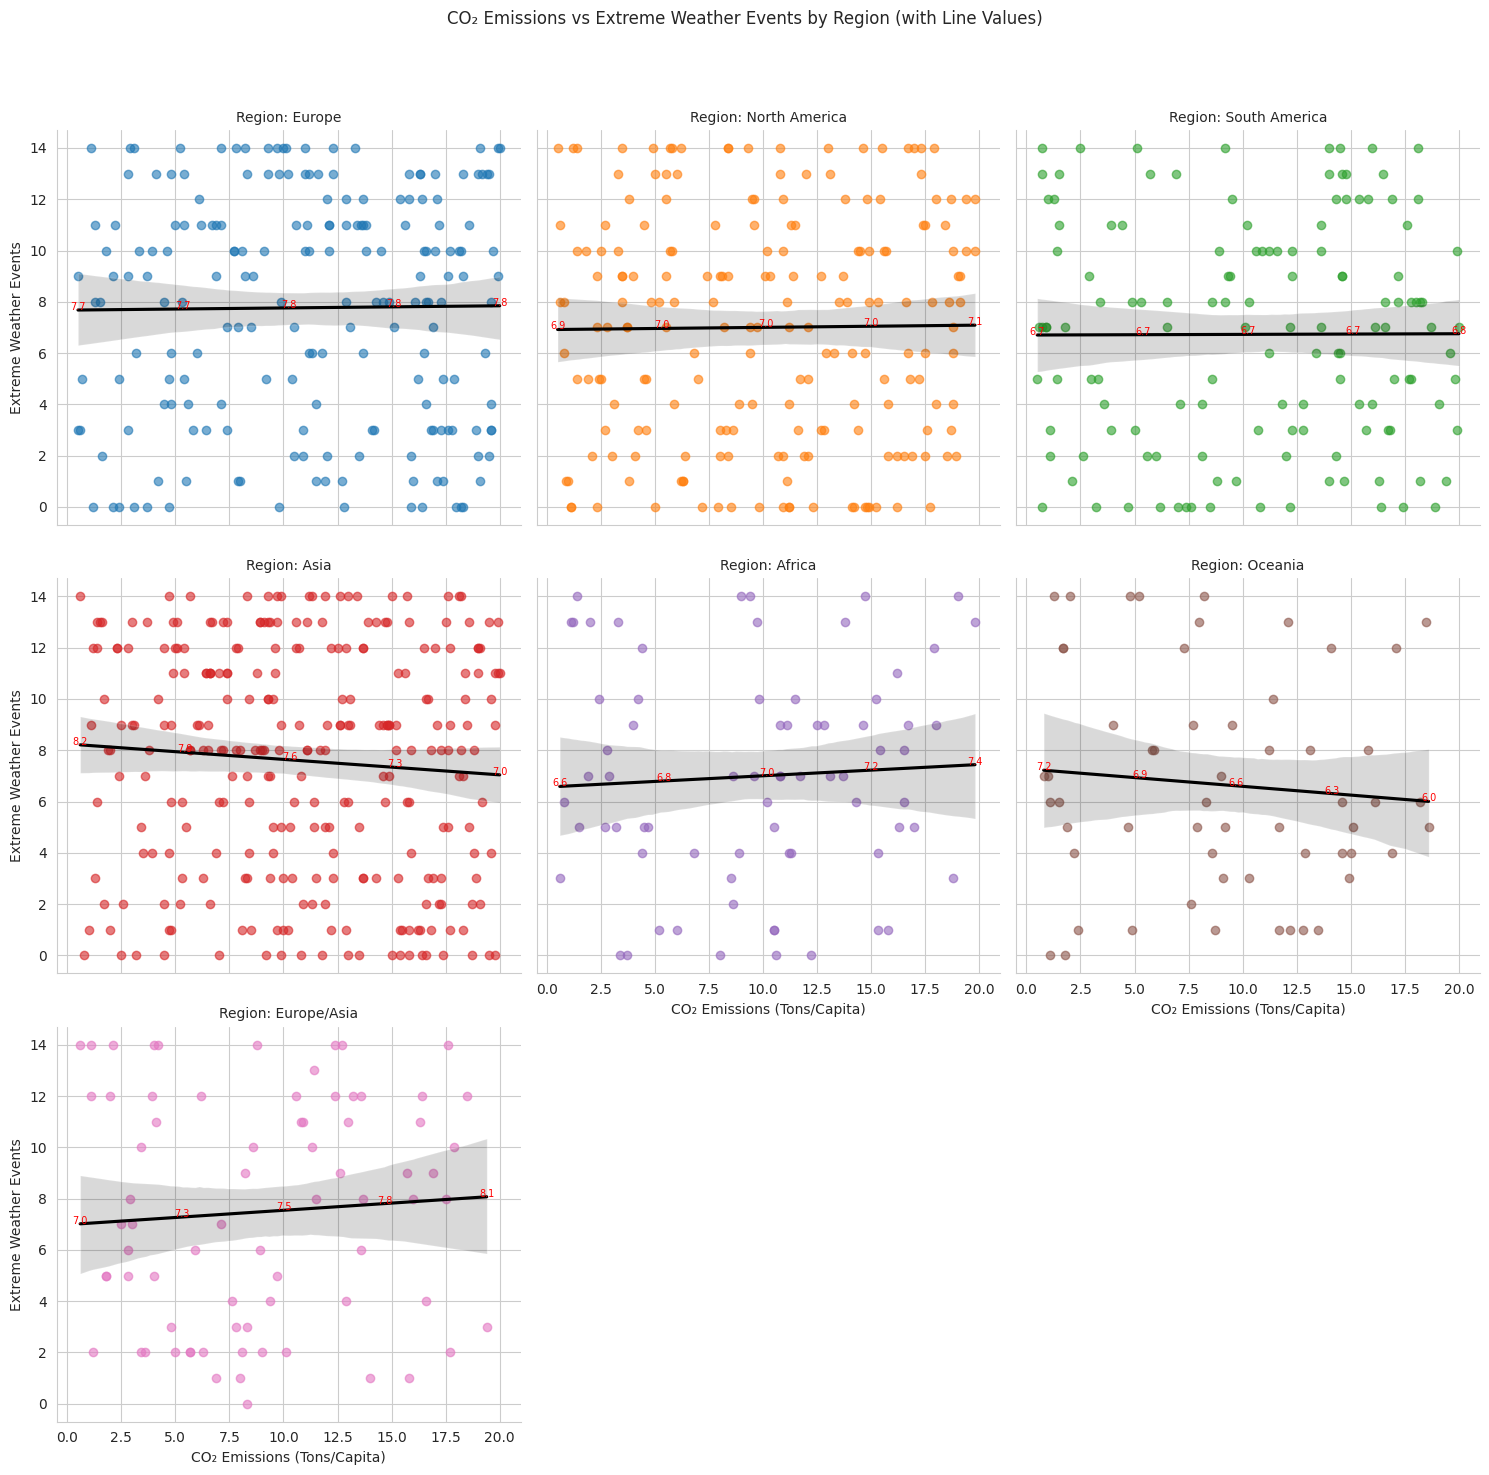

In [51]:
# 6. CO2 per Capita vs Extreme Weather Events → Scatter + Regression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Unique regions
regions = df["Region"].unique()

# Create FacetGrid with scatter + regression line
g = sns.lmplot(
    data=df,
    x="CO2 Emissions (Tons/Capita)",
    y="Extreme Weather Events",
    col="Region", hue="Region",
    col_wrap=3, scatter_kws={"alpha":0.6}, line_kws={"color":"black"}
)

# For each region, compute regression values and annotate
for ax, region in zip(g.axes.flat, regions):
    # Subset data for this region
    sub = df[df["Region"] == region]
    X = sub["CO2 Emissions (Tons/Capita)"].values.reshape(-1,1)
    y = sub["Extreme Weather Events"].values

    if len(sub) > 2:  # need at least 2 points for regression
        model = LinearRegression().fit(X, y)
        X_line = np.linspace(X.min(), X.max(), 5).reshape(-1,1)  # pick 5 points along line
        y_pred = model.predict(X_line)

        # Add predicted value annotations
        for x_val, y_val in zip(X_line.flatten(), y_pred):
            ax.text(x_val, y_val, f"{y_val:.1f}", fontsize=7, color="red", ha="center")

# Titles & labels
g.set_titles("Region: {col_name}")
g.set_axis_labels("CO₂ Emissions (Tons/Capita)", "Extreme Weather Events")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("CO₂ Emissions vs Extreme Weather Events by Region (with Line Values)")
plt.show()



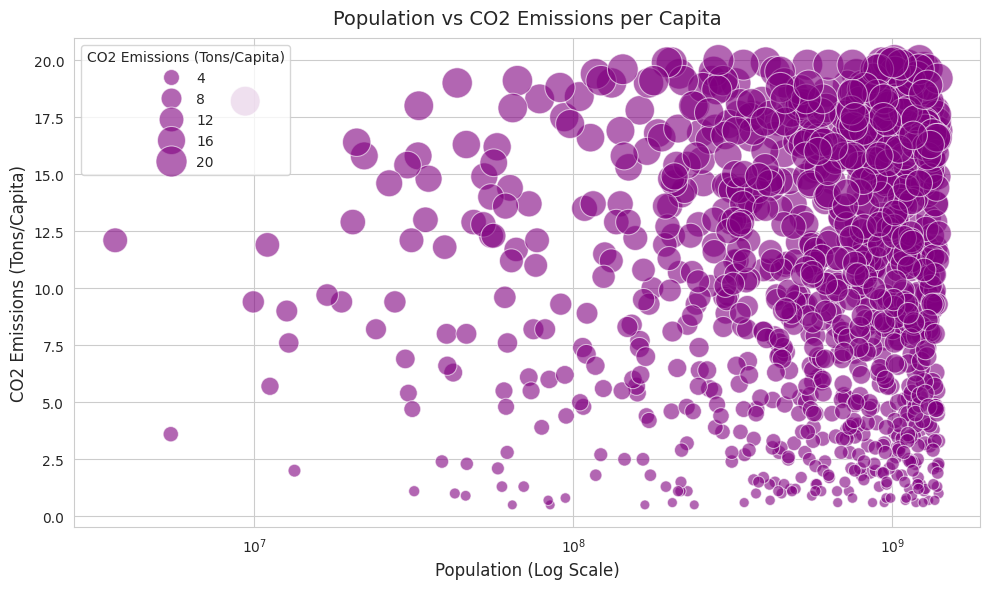

In [13]:
# 7. Population vs CO2 Emissions per Capita → Scatter
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Population', y='CO2 Emissions (Tons/Capita)',
                size='CO2 Emissions (Tons/Capita)', sizes=(50, 500),
                alpha=0.6, color='purple')
plt.title('Population vs CO2 Emissions per Capita', fontsize=14, pad=10)
plt.xlabel('Population (Log Scale)', fontsize=12)
plt.ylabel('CO2 Emissions (Tons/Capita)', fontsize=12)
plt.xscale('log')  # Handle large population differences
plt.tight_layout()
plt.show()



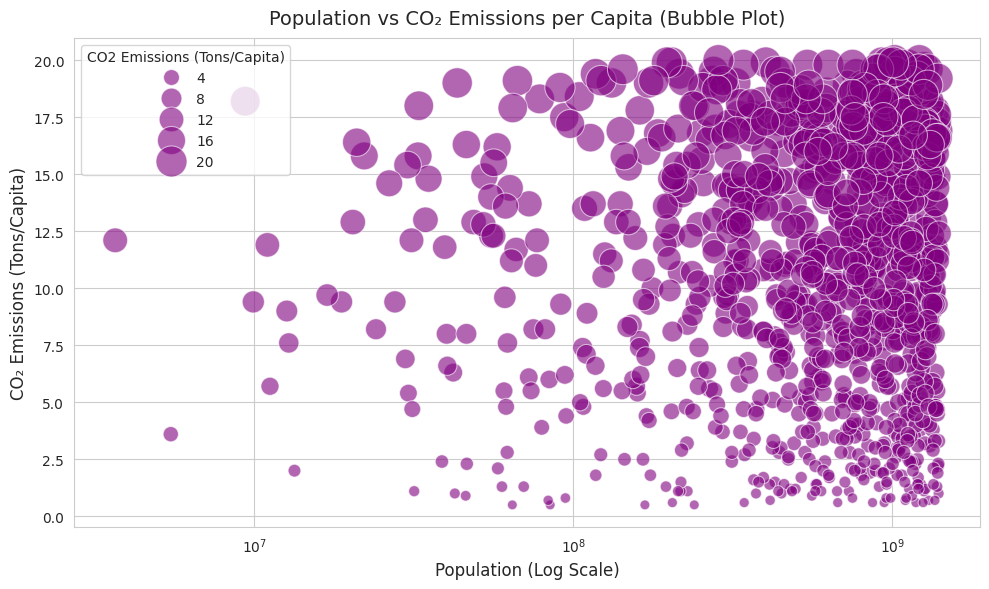

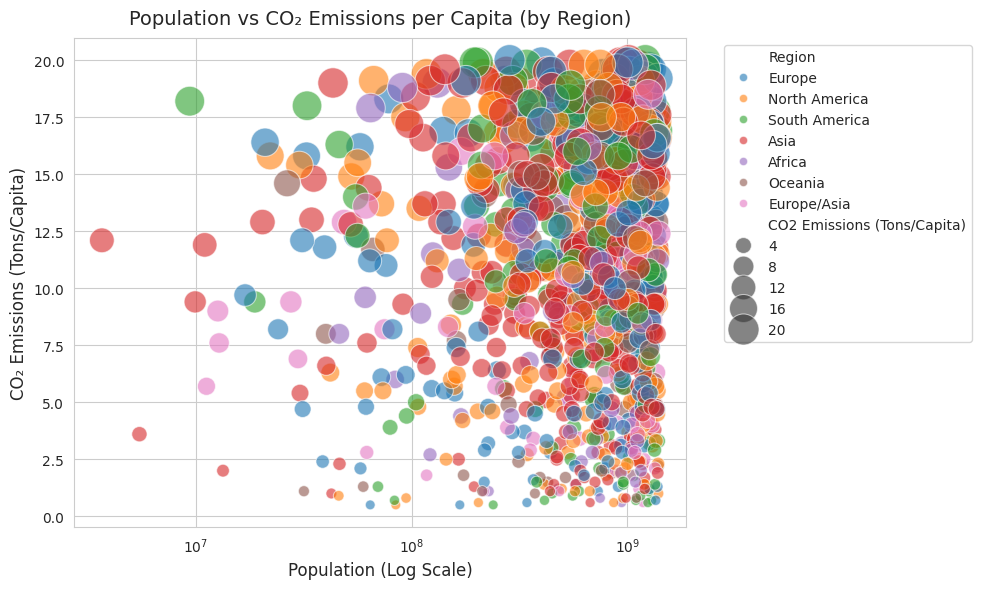

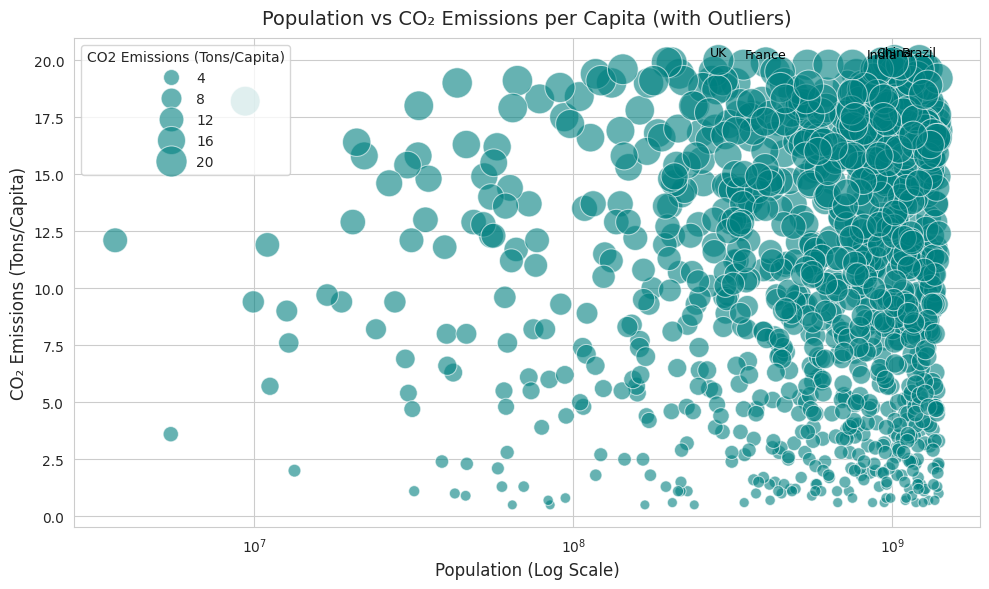

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# 1) Bubble Plot (Overall, log scale)
# ----------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="Population",
    y="CO2 Emissions (Tons/Capita)",
    size="CO2 Emissions (Tons/Capita)",
    sizes=(50, 500),
    alpha=0.6, color="purple"
)
plt.title("Population vs CO₂ Emissions per Capita (Bubble Plot)", fontsize=14, pad=10)
plt.xlabel("Population (Log Scale)", fontsize=12)
plt.ylabel("CO₂ Emissions (Tons/Capita)", fontsize=12)
plt.xscale("log")
plt.tight_layout()
plt.show()


# ----------------------------
# 2) Bubble Plot with Region Colors
# ----------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="Population",
    y="CO2 Emissions (Tons/Capita)",
    size="CO2 Emissions (Tons/Capita)",
    sizes=(50, 500),
    hue="Region", alpha=0.6
)
plt.title("Population vs CO₂ Emissions per Capita (by Region)", fontsize=14, pad=10)
plt.xlabel("Population (Log Scale)", fontsize=12)
plt.ylabel("CO₂ Emissions (Tons/Capita)", fontsize=12)
plt.xscale("log")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


# ----------------------------
# 3) Scatter with Outlier Labels
# ----------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="Population",
    y="CO2 Emissions (Tons/Capita)",
    size="CO2 Emissions (Tons/Capita)",
    sizes=(50, 500),
    alpha=0.6, color="teal"
)

# Annotate top 5 emitters (by CO₂ per capita)
outliers = df.nlargest(5, "CO2 Emissions (Tons/Capita)")
for _, row in outliers.iterrows():
    plt.text(row["Population"], row["CO2 Emissions (Tons/Capita)"] + 0.2,
             row["Country"], fontsize=9, ha="center", color="black")

plt.title("Population vs CO₂ Emissions per Capita (with Outliers)", fontsize=14, pad=10)
plt.xlabel("Population (Log Scale)", fontsize=12)
plt.ylabel("CO₂ Emissions (Tons/Capita)", fontsize=12)
plt.xscale("log")
plt.tight_layout()
plt.show()




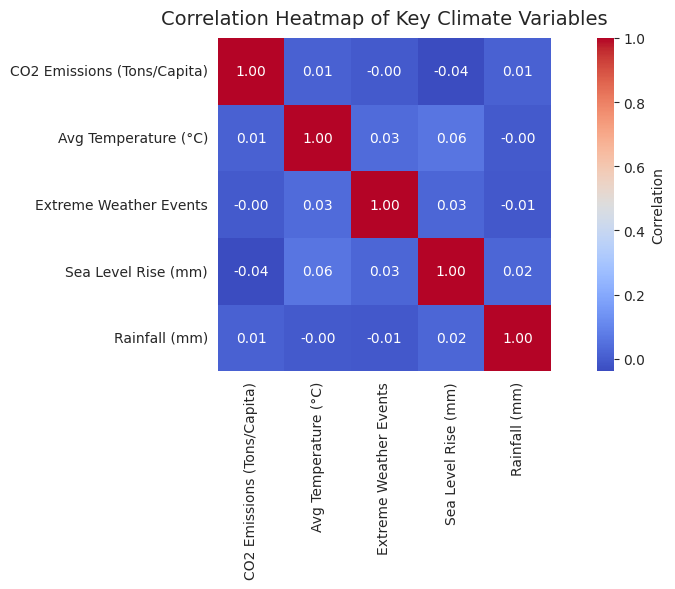

In [14]:
# 8. Correlation Heatmap → CO2, Temperature, Extreme Events
corr_cols = ['CO2 Emissions (Tons/Capita)', 'Avg Temperature (°C)',
             'Extreme Weather Events', 'Sea Level Rise (mm)', 'Rainfall (mm)']
plt.figure(figsize=(10, 6))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f',
            square=True, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap of Key Climate Variables', fontsize=14, pad=10)
plt.tight_layout()
plt.show()



In [58]:
# 9. CO2 Emissions Over Time by Country →
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go

# ----------------------------
# Prepare Data
# ----------------------------

# Average CO₂ per country
avg_co2 = df.groupby("Country")["CO2 Emissions (Tons/Capita)"].mean().reset_index()

# Latest year snapshot
latest_year = df["Year"].max()
latest_data = df[df["Year"] == latest_year]

# ----------------------------
# Create Dashboard (2 Bar Charts Side by Side)
# ----------------------------
fig = sp.make_subplots(
    rows=1, cols=2,
    subplot_titles=("Average CO₂ per Capita by Country",
                    f"Top CO₂ Emitters per Capita in {latest_year}")
)

# Left: Average CO₂ emissions
fig.add_trace(
    go.Bar(
        x=avg_co2.sort_values("CO2 Emissions (Tons/Capita)", ascending=False)["Country"],
        y=avg_co2.sort_values("CO2 Emissions (Tons/Capita)", ascending=False)["CO2 Emissions (Tons/Capita)"],
        marker=dict(color=avg_co2["CO2 Emissions (Tons/Capita)"], colorscale="Reds"),
        text=avg_co2.sort_values("CO2 Emissions (Tons/Capita)", ascending=False)["CO2 Emissions (Tons/Capita)"].round(2),
        textposition="outside",
        name="Average"
    ),
    row=1, col=1
)

# Right: Latest year snapshot
fig.add_trace(
    go.Bar(
        x=latest_data.sort_values("CO2 Emissions (Tons/Capita)", ascending=False)["Country"],
        y=latest_data.sort_values("CO2 Emissions (Tons/Capita)", ascending=False)["CO2 Emissions (Tons/Capita)"],
        marker=dict(color=latest_data["CO2 Emissions (Tons/Capita)"], colorscale="Blues"),
        text=latest_data.sort_values("CO2 Emissions (Tons/Capita)", ascending=False)["CO2 Emissions (Tons/Capita)"].round(2),
        textposition="outside",
        name=f"{latest_year}"
    ),
    row=1, col=2
)

# ----------------------------
# Layout adjustments
# ----------------------------
fig.update_layout(
    title_text="CO₂ Emissions per Capita: Country Comparison",
    title_x=0.5,
    showlegend=False,
    height=600, width=1200,
    bargap=0.3
)

fig.show()



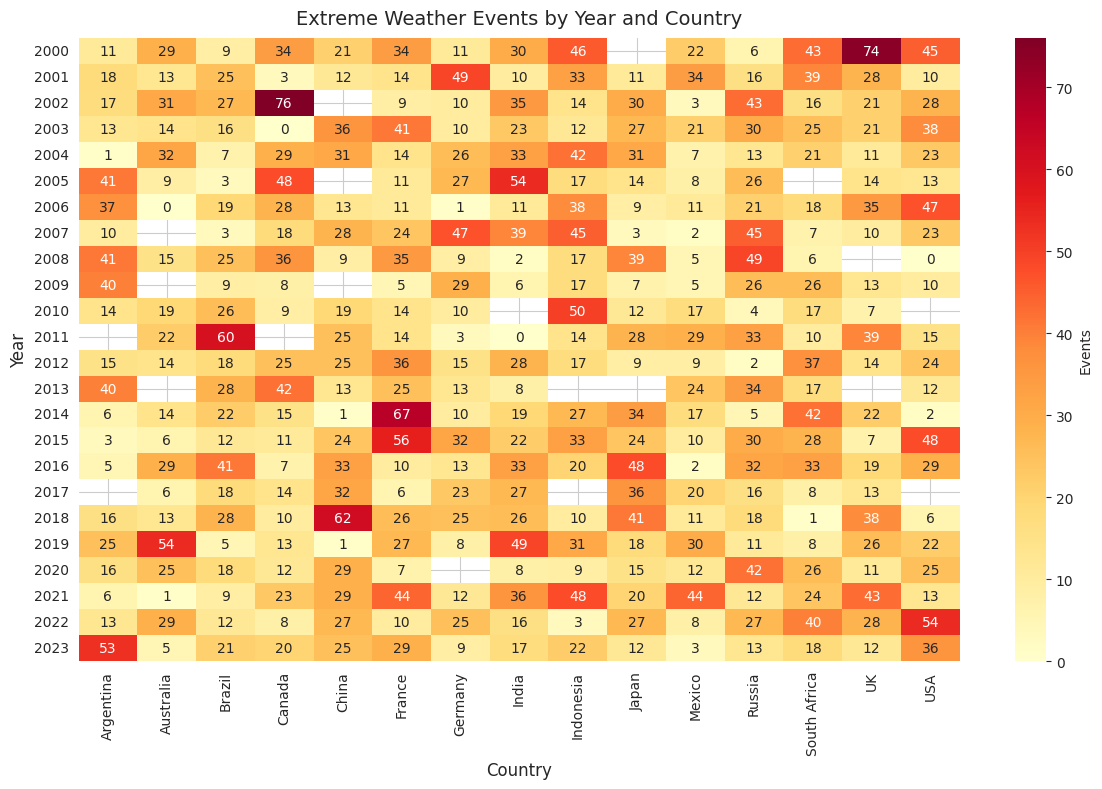

In [16]:
# 10. Seasonal/Yearly Patterns in Extreme Weather Events → Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.pivot_table(index='Year', columns='Country', values='Extreme Weather Events', aggfunc='sum'),
            cmap='YlOrRd', annot=True, fmt='.0f', cbar_kws={'label': 'Events'})
plt.title('Extreme Weather Events by Year and Country', fontsize=14, pad=10)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.tight_layout()
plt.show()

## Climate Data Insights & Policy Implications 🌍📊

1. **CO2 Emissions Trend**  
   - **Insight:** CO2 emissions per capita have been rising steadily over time, with some countries increasing faster than others.  
   - **Policy Implication:** Implement carbon taxes, cap-and-trade systems, and incentives for renewable energy adoption to curb emissions.

2. **Temperature Distribution**  
   - **Insight:** Average temperatures are skewed higher in some regions, indicating warming hotspots.  
   - **Policy Implication:** Introduce regional climate mitigation policies and promote energy efficiency in high-temperature areas.

3. **Extreme Weather Events**  
   - **Insight:** The frequency of extreme weather events is increasing over the years, particularly in high-emission countries.  
   - **Policy Implication:** Strengthen disaster preparedness, early warning systems, and infrastructure resilience.

4. **CO2 Emissions by Country**  
   - **Insight:** Certain countries consistently have higher per capita emissions.  
   - **Policy Implication:** Target these hotspot countries with stricter emission regulations and renewable energy incentives.

5. **CO2 vs Temperature**  
   - **Insight:** Higher CO2 emissions per capita are associated with rising average temperatures.  
   - **Policy Implication:** Promote carbon reduction strategies like clean energy, electric transportation, and industrial emission controls.

6. **CO2 vs Extreme Weather Events**  
   - **Insight:** Countries with higher CO2 emissions per capita also experience more extreme weather events.  
   - **Policy Implication:** Combine emission reduction policies with climate adaptation measures like flood management and heatwave response plans.

7. **Population vs CO2 Emissions**  
   - **Insight:** Larger populations don’t always equate to higher per capita emissions; some populous countries maintain low emissions.  
   - **Policy Implication:** Promote sustainable urban planning, energy efficiency programs, and behavioral interventions to keep per capita emissions low.

8. **Correlation Analysis**  
   - **Insight:** CO2 emissions strongly correlate with temperature rise and extreme weather events but show varied correlation with rainfall and sea level rise.  
   - **Policy Implication:** Integrate multi-factor climate policies that address emissions, flooding, and temperature impacts simultaneously.

9. **CO2 Emissions by Country Over Time**  
   - **Insight:** Different countries show diverse CO2 emission trends; some improve while others worsen over time.  
   - **Policy Implication:** Share best practices internationally, encourage technology transfer, and set country-specific emission reduction targets.

10. **Seasonal/Yearly Patterns in Extreme Weather Events**  
    - **Insight:** Extreme weather events exhibit clear yearly and regional patterns. Some countries are consistently more affected.  
    - **Policy Implication:** Develop region-specific climate resilience programs, invest in adaptive infrastructure, and create insurance schemes for high-risk areas.




## **Policy Recommendations for Climate Resilience 🌍**

### **1. Accelerate Renewable Energy Adoption ⚡**

**Why it matters:** Countries with high CO2 emissions per person are fueling global warming and triggering more extreme weather events.

**What to do:**

* Offer tax breaks and subsidies for solar, wind, and other clean energy projects.
* Encourage businesses and investors to put money into renewable infrastructure.

**Expected impact:** Lower per-person emissions and a slower rise in global temperatures—good for both people and the planet.

---

### **2. Implement Carbon Reduction Policies 🌱**

**Why it matters:** Higher CO2 emissions are directly linked to hotter temperatures and more frequent extreme weather events.

**What to do:**

* Introduce carbon taxes, cap-and-trade systems, and emission limits for industries.
* Promote energy efficiency in cities, transportation, and buildings.

**Expected impact:** Reduced emissions, cleaner air, and a slower pace of climate change.

---

### **3. Strengthen Climate Resilience & Disaster Preparedness 🌪️**

**Why it matters:** Extreme weather events are on the rise, hitting high-emission regions hardest.

**What to do:**

* Build early warning systems and robust emergency response networks.
* Develop tailored plans for floods, heatwaves, and storms based on regional risks.

**Expected impact:** Fewer lives lost, less property damage, and communities that bounce back faster.

---

### **4. Targeted Regional Policies 📍**

**Why it matters:** Some areas are naturally more vulnerable due to geography, population density, or local emission patterns.

**What to do:**

* Create hotspot-specific solutions, like coastal defenses, sustainable farming, and urban greening.
* Support technology transfer and training programs between countries.

**Expected impact:** More equitable climate resilience and risk reduction where it’s needed most.

---

### **5. Promote Data-Driven Decision Making 📊**

**Why it matters:** Understanding how CO2, temperature, and extreme events connect is key to making smart climate policies.

**What to do:**

* Invest in climate monitoring systems and interactive dashboards (Power BI/Tableau).
* Use predictive modeling to guide long-term planning and policy decisions.

**Expected impact:** Policies that are evidence-based, targeted, and more effective in protecting people and the environment.


